In [27]:
import numpy as np

# Load the file with allow_pickle=True
abide_data = np.load("C:/path/to/the/save/folder/ABIDE_pcp/abide.npy", allow_pickle=True)

# Since the array has shape (), extract the actual dictionary
data = abide_data.item()

# Print the available keys
print("Dictionary keys:", data.keys())

# Access time series
timeseries = data["timeseires"]  # Fix the key name if necessary
print("Timeseries shape:", timeseries.shape)



Dictionary keys: dict_keys(['timeseires', 'label', 'corr', 'pcorr', 'site'])
Timeseries shape: (1009, 200, 100)


In [43]:
# Get number of ROIs
num_subjects, num_rois, num_timepoints = timeseries.shape
print(f"Total Subjects: {num_subjects}")
print(f"Total ROIs: {num_rois}")
print(f"Timepoints per ROI: {num_timepoints}")

Total Subjects: 1009
Total ROIs: 200
Timepoints per ROI: 100


In [44]:
import numpy as np
import networkx as nx

# Load ABIDE data
abide_data = np.load("C:/path/to/the/save/folder/ABIDE_pcp/abide.npy", allow_pickle=True).item()
timeseries = abide_data["timeseires"]  # Ensure this key is correct

# Select first subject’s time series
subject_timeseries = timeseries[0]  # Shape: (ROIs, Timepoints)

# Compute correlation matrix
corr_matrix = np.corrcoef(subject_timeseries)  # Shape: (ROIs, ROIs)

# Remove self-connections
np.fill_diagonal(corr_matrix, 0)

# Create a graph
G = nx.Graph()

# Add nodes (ROIs)
num_rois = corr_matrix.shape[0]  # Total ROIs
G.add_nodes_from(range(num_rois))

# Add edges with thresholding (removing weak connections)
threshold = 0.3  # Adjust threshold
for i in range(num_rois):
    for j in range(i + 1, num_rois):  # Avoid self-loops and duplicates
        if abs(corr_matrix[i, j]) > threshold:
            G.add_edge(i, j)

# Print total nodes and edges
print(f"Total ROIs (Nodes): {G.number_of_nodes()}")
print(f"Total Connections (Edges): {G.number_of_edges()}")


Total ROIs (Nodes): 200
Total Connections (Edges): 12977


In [48]:
import numpy as np

# Load the file with allow_pickle=True
abide_data = np.load("C:/path/to/the/save/folder/ABIDE_pcp/abide.npy", allow_pickle=True)

# Since the array has shape (), extract the actual dictionary
data = abide_data.item()

In [53]:
for i in range(1008):

    # Extract individual subject data
    time_series = data['timeseires'][i]   # Time-series data (100 time points)
    corr_matrix = data['corr'][i]         # Correlation matrix (200x200)
    pcorr_matrix = data['pcorr'][i]       # Partial correlation matrix (200x200)
    label = data['label'][i]              # Diagnosis label (0 = ASD, 1 = TD)
    site = data['site'][i]                # Acquisition site ID

    print(f"Subject {i} - Site: {site}, Label: {label}")
    print("Time-Series Data Shape:", time_series.shape)
    print("Correlation Matrix Shape:", corr_matrix.shape)
    print("Partial Correlation Matrix Shape:", pcorr_matrix.shape)

Subject 0 - Site: PITT, Label: 0.0
Time-Series Data Shape: (200, 100)
Correlation Matrix Shape: (200, 200)
Partial Correlation Matrix Shape: (200, 200)
Subject 1 - Site: PITT, Label: 0.0
Time-Series Data Shape: (200, 100)
Correlation Matrix Shape: (200, 200)
Partial Correlation Matrix Shape: (200, 200)
Subject 2 - Site: PITT, Label: 0.0
Time-Series Data Shape: (200, 100)
Correlation Matrix Shape: (200, 200)
Partial Correlation Matrix Shape: (200, 200)
Subject 3 - Site: PITT, Label: 0.0
Time-Series Data Shape: (200, 100)
Correlation Matrix Shape: (200, 200)
Partial Correlation Matrix Shape: (200, 200)
Subject 4 - Site: PITT, Label: 0.0
Time-Series Data Shape: (200, 100)
Correlation Matrix Shape: (200, 200)
Partial Correlation Matrix Shape: (200, 200)
Subject 5 - Site: PITT, Label: 0.0
Time-Series Data Shape: (200, 100)
Correlation Matrix Shape: (200, 200)
Partial Correlation Matrix Shape: (200, 200)
Subject 6 - Site: PITT, Label: 0.0
Time-Series Data Shape: (200, 100)
Correlation Matrix

In [56]:
import numpy as np
abide_data = np.load("C:/path/to/the/save/folder/ABIDE_pcp/abide.npy", allow_pickle=True).item()

# Extract labels
labels = abide_data['label']

# Print unique labels and their counts
print("Unique Labels:", np.unique(labels))
print("Label Distribution:", np.bincount(labels.astype(int)))

Unique Labels: [0. 1.]
Label Distribution: [493 516]


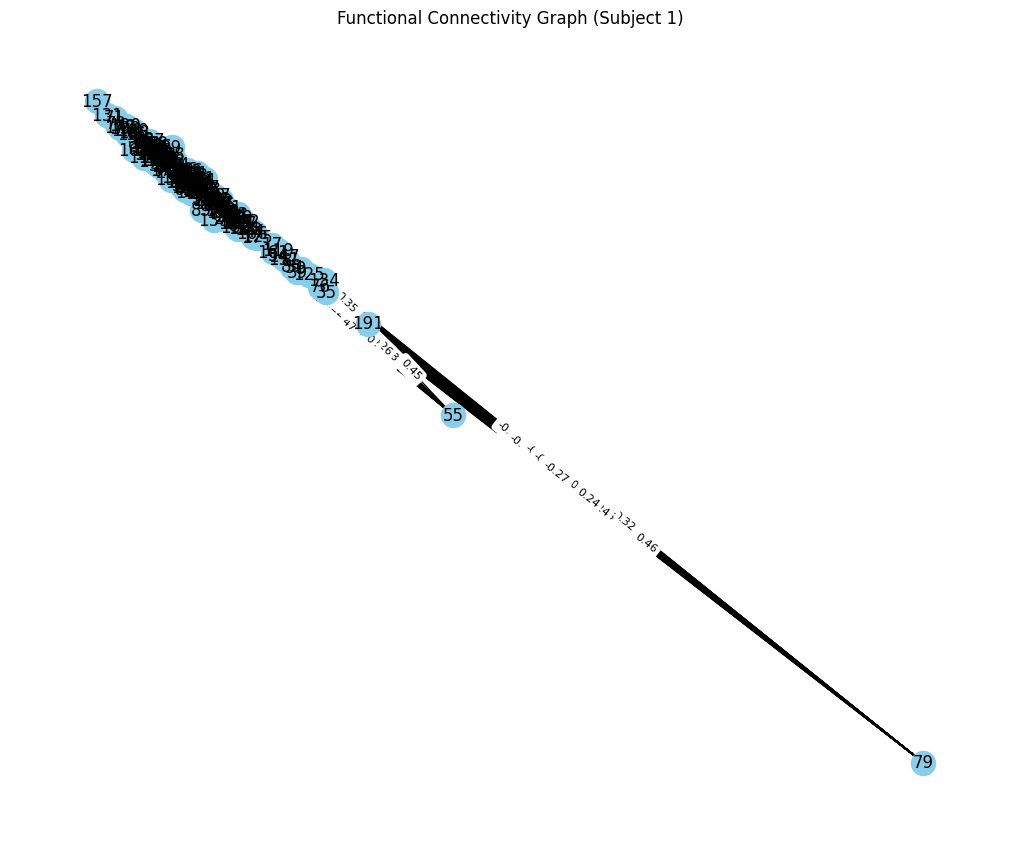

In [33]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load ABIDE data
abide_data = np.load("C:/path/to/the/save/folder/ABIDE_pcp/abide.npy", allow_pickle=True).item()
timeseries = abide_data["timeseires"]  # Fix the key if needed

# Select one subject's time series (first subject)
subject_timeseries = timeseries[0]  # Shape: (ROI, T)

# Compute correlation matrix
corr_matrix = np.corrcoef(subject_timeseries)

# Remove self-connections
np.fill_diagonal(corr_matrix, 0)

# Create a graph
G = nx.Graph()

# Add nodes (ROIs)
num_nodes = corr_matrix.shape[0]
G.add_nodes_from(range(num_nodes))

# Add edges with weights
threshold = 0.2  # Only keep strong connections
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        weight = corr_matrix[i, j]
        if abs(weight) > threshold:
            G.add_edge(i, j, weight=weight)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_size=300, node_color="skyblue")
edges = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edges.items()}, font_size=8)
plt.title("Functional Connectivity Graph (Subject 1)")
plt.show()


Timeseries shape: (1009, 200, 100)
Selected subject timeseries shape: (200, 100)
Correlation matrix shape: (200, 200)
Number of nodes: 200
Number of edges: 12977


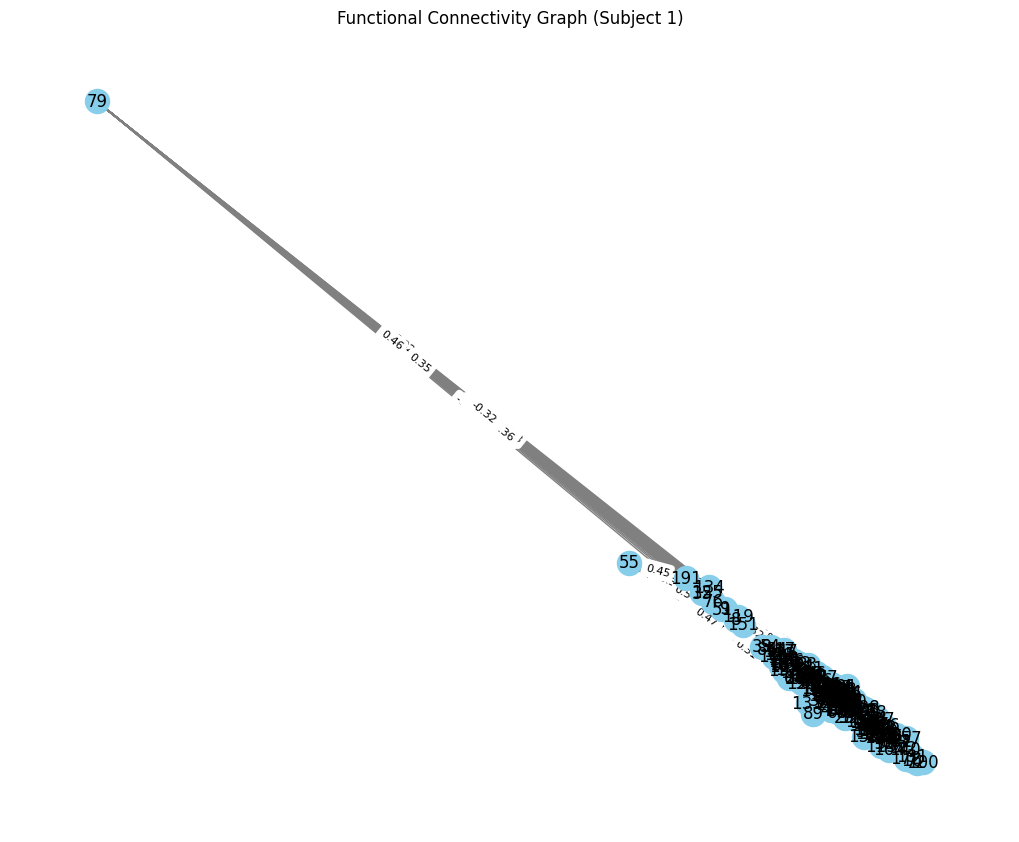

In [35]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load ABIDE data
abide_data = np.load("C:/path/to/the/save/folder/ABIDE_pcp/abide.npy", allow_pickle=True).item()
timeseries = abide_data["timeseires"]  # Fix the key if needed

# Debug: Check shape of the data
print("Timeseries shape:", timeseries.shape)  # Should be (Subjects, ROIs, Timepoints)

# Select first subject’s time series
subject_timeseries = timeseries[0]  # Shape: (ROIs, Timepoints)
print("Selected subject timeseries shape:", subject_timeseries.shape)

# Compute correlation matrix
corr_matrix = np.corrcoef(subject_timeseries)  # Shape: (ROIs, ROIs)
print("Correlation matrix shape:", corr_matrix.shape)

# Remove self-connections
np.fill_diagonal(corr_matrix, 0)

# Create graph
G = nx.Graph()
num_nodes = corr_matrix.shape[0]

# Add nodes (ROIs)
G.add_nodes_from(range(num_nodes))

# Add edges with weights (Thresholding weak connections)
threshold = 0.3  # Adjust threshold for clarity
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        weight = corr_matrix[i, j]
        if abs(weight) > threshold:
            G.add_edge(i, j, weight=weight)

# Debug: Check graph info
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Normalize weights (Optional: Uncomment if needed)
# for u, v, data in G.edges(data=True):
#     data["weight"] = abs(data["weight"])  # Convert negative weights to positive

# Draw the graph
plt.figure(figsize=(10, 8))

# Use spring layout (works with positive & negative weights)
pos = nx.spring_layout(G, seed=42)

# Draw nodes & edges
nx.draw(G, pos, with_labels=True, node_size=300, node_color="skyblue", edge_color="gray")

# Draw edge weights (formatted to 2 decimal places)
edges = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edges.items()}, font_size=8)

plt.title("Functional Connectivity Graph (Subject 1)")
plt.show()


In [37]:
!pip install plotly

^C


   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/14.8 MB 4.2 MB/s eta 0:00:04
   ----- ---------------------------------- 2.1/14.8 MB 4.9 MB/s eta 0:00:03
   -------- ------------------------------- 3.1/14.8 MB 5.3 MB/s eta 0:00:03
   ------------ --------------------------- 4.5/14.8 MB 5.4 MB/s eta 0:00:02
   ------------ --------------------------- 4.5/14.8 MB 5.4 MB/s eta 0:00:02
   -------------- ------------------------- 5.2/14.8 MB 4.3 MB/s eta 0:00:03
   ---------------- ----------------------- 6.3/14.8 MB 4.3 MB/s eta 0:00:02
   ------------------- -------------------- 7.3/14.8 MB 4.4 MB/s eta 0:00:02
   ----------------------- ---------------- 8.7/14.8 MB 4.5 MB/s eta 0:00:02
   -------------------------- ------------- 10.0/14.8 MB 4.7 MB/s eta 0:00:02
   ------------------------------ --------- 11.3/14.8 MB 4.9 MB/s eta 0:00:01
   --------------------------------- ------ 12.6/14.8 MB 5.0 MB/s eta 0:00:01
   

In [36]:
import numpy as np
import networkx as nx
import plotly.graph_objects as go

# Load ABIDE data
abide_data = np.load("C:/path/to/the/save/folder/ABIDE_pcp/abide.npy", allow_pickle=True).item()
timeseries = abide_data["timeseires"]  # Fix key if needed

# Debug: Check shape of the data
print("Timeseries shape:", timeseries.shape)  # Expected: (Subjects, ROIs, Timepoints)

# Select first subject’s time series
subject_timeseries = timeseries[0]  # Shape: (ROIs, Timepoints)
print("Selected subject timeseries shape:", subject_timeseries.shape)

# Compute correlation matrix
corr_matrix = np.corrcoef(subject_timeseries)  # Shape: (ROIs, ROIs)
print("Correlation matrix shape:", corr_matrix.shape)

# Remove self-connections
np.fill_diagonal(corr_matrix, 0)

# Create graph
G = nx.Graph()
num_nodes = corr_matrix.shape[0]

# Add nodes (ROIs)
G.add_nodes_from(range(num_nodes))

# Add edges with weights (Thresholding weak connections)
threshold = 0.3  # Adjust threshold for clarity
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        weight = corr_matrix[i, j]
        if abs(weight) > threshold:
            G.add_edge(i, j, weight=weight)

# Debug: Check graph info
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Get node positions using spring layout
pos = nx.spring_layout(G, seed=42)

# Convert positions into separate lists for Plotly
node_x, node_y = zip(*pos.values())

# Create edges for


ModuleNotFoundError: No module named 'plotly'

Timeseries shape: (1009, 200, 100)
Selected subject timeseries shape: (200, 100)
Correlation matrix shape: (200, 200)
Number of nodes in subgraph: 20
Number of edges in subgraph: 110


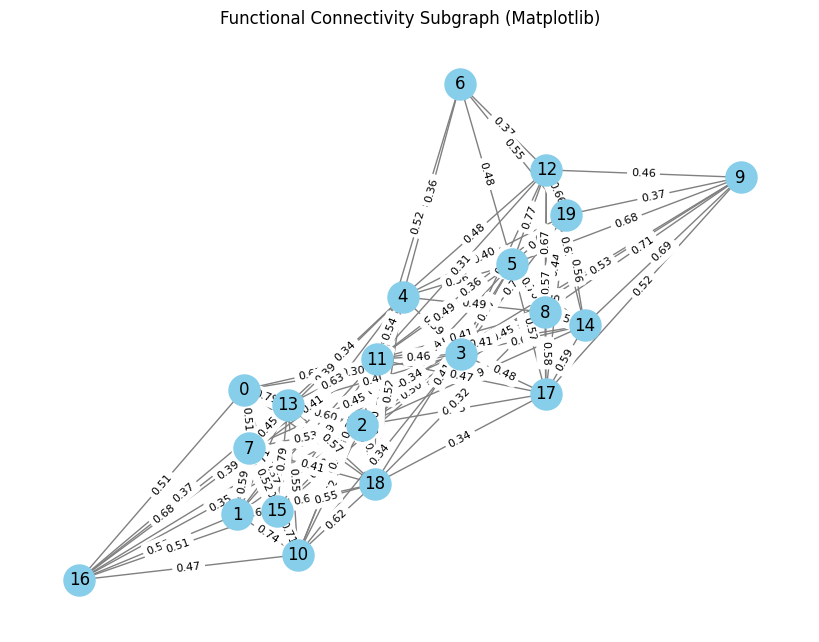

In [23]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load ABIDE data
abide_data = np.load("C:/path/to/the/save/folder/ABIDE_pcp/abide.npy", allow_pickle=True).item()
timeseries = abide_data["timeseires"]  # Check if the key is correct

# Debug: Check shape
print("Timeseries shape:", timeseries.shape)  # Expected: (Subjects, ROIs, Timepoints)

# Select first subject’s time series
subject_timeseries = timeseries[0]  # Shape: (ROIs, Timepoints)
print("Selected subject timeseries shape:", subject_timeseries.shape)

# Compute correlation matrix
corr_matrix = np.corrcoef(subject_timeseries)  # Shape: (ROIs, ROIs)
print("Correlation matrix shape:", corr_matrix.shape)

# Remove self-connections
np.fill_diagonal(corr_matrix, 0)

# Select a **subset** of ROIs (e.g., first 20)
subset_size = 20  # Adjust as needed
subset_nodes = list(range(subset_size))  # Select first `subset_size` ROIs

# Create a subgraph
G = nx.Graph()

# Add selected nodes
G.add_nodes_from(subset_nodes)

# Add edges with weights (thresholding weak connections)
threshold = 0.3  # Adjust threshold
for i in subset_nodes:
    for j in subset_nodes:
        if i != j:  # Avoid self-loops
            weight = corr_matrix[i, j]
            if abs(weight) > threshold:
                G.add_edge(i, j, weight=weight)

# Debug: Check graph info
print(f"Number of nodes in subgraph: {G.number_of_nodes()}")
print(f"Number of edges in subgraph: {G.number_of_edges()}")

# Generate positions for nodes
pos = nx.spring_layout(G, seed=42)

# Draw graph using Matplotlib
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray")

# Draw edge labels (weights)
edge_labels = {(i, j): f"{G[i][j]['weight']:.2f}" for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Functional Connectivity Subgraph (Matplotlib)")
plt.show()


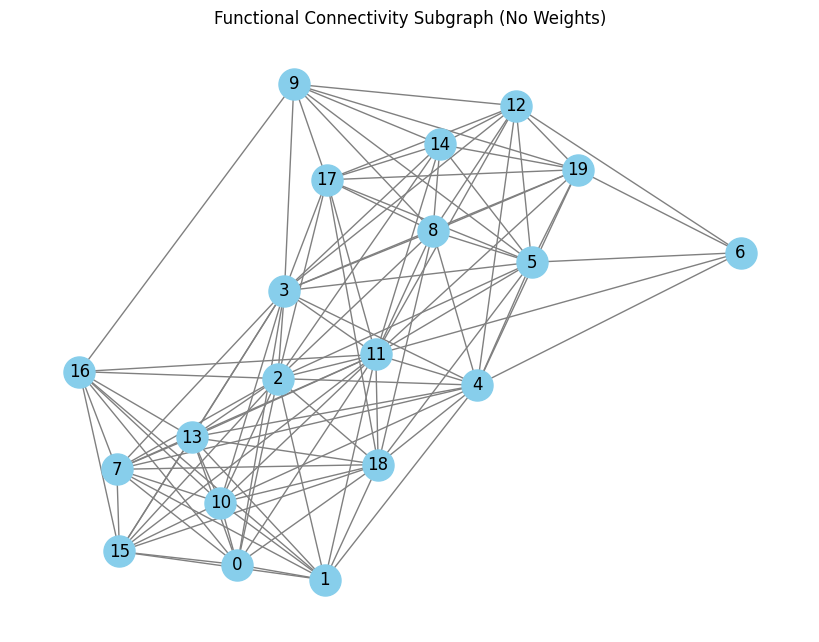

In [42]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load ABIDE data
abide_data = np.load("C:/path/to/the/save/folder/ABIDE_pcp/abide.npy", allow_pickle=True).item()
timeseries = abide_data["timeseires"]  # Check if the key is correct

# Select first subject’s time series
subject_timeseries = timeseries[0]  # Shape: (ROIs, Timepoints)

# Compute correlation matrix
corr_matrix = np.corrcoef(subject_timeseries)  # Shape: (ROIs, ROIs)

# Remove self-connections
np.fill_diagonal(corr_matrix, 0)

# Select a **subset** of ROIs (e.g., first 20)
subset_size = 20  # Adjust as needed
subset_nodes = list(range(subset_size))  # Select first `subset_size` ROIs

# Create a subgraph
G = nx.Graph()
G.add_nodes_from(subset_nodes)

# Add edges with a threshold (removing weak connections)
threshold = 0.3  # Adjust threshold
for i in subset_nodes:
    for j in subset_nodes:
        if i != j and abs(corr_matrix[i, j]) > threshold:
            G.add_edge(i, j)

# Generate positions for nodes
pos = nx.spring_layout(G, seed=42)

# Draw graph using Matplotlib (No Weights)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray")

plt.title("Functional Connectivity Subgraph (No Weights)")
plt.show()


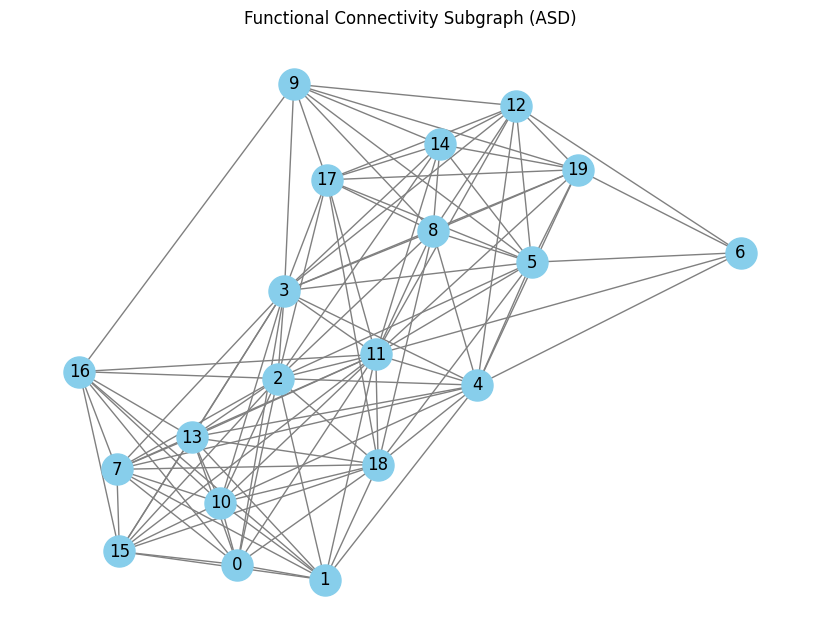

In [45]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Choose ASD or TD dataset
dataset_type = "ASD"  # Change to "TD" for TD data
file_path = f"C:/path/to/the/save/folder/ABIDE_pcp/abide_{dataset_type.lower()}.npy"

# Load ABIDE data
abide_data = np.load(file_path, allow_pickle=True).item()

timeseries = abide_data["timeseries"]  # Use the corrected key

# Select first subject’s time series
subject_timeseries = timeseries[0]  # Shape: (ROIs, Timepoints)

# Compute correlation matrix
corr_matrix = np.corrcoef(subject_timeseries)  # Shape: (ROIs, ROIs)

# Remove self-connections
np.fill_diagonal(corr_matrix, 0)

# Select a **subset** of ROIs (e.g., first 20)
subset_size = 20  # Adjust as needed
subset_nodes = list(range(subset_size))  # Select first `subset_size` ROIs

# Create a subgraph
G = nx.Graph()
G.add_nodes_from(subset_nodes)

# Add edges with a threshold (removing weak connections)
threshold = 0.3  # Adjust threshold
for i in subset_nodes:
    for j in subset_nodes:
        if i != j and abs(corr_matrix[i, j]) > threshold:
            G.add_edge(i, j)

# Generate positions for nodes
pos = nx.spring_layout(G, seed=42)

# Draw graph using Matplotlib (No Weights)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray")

plt.title(f"Functional Connectivity Subgraph ({dataset_type})")
plt.show()


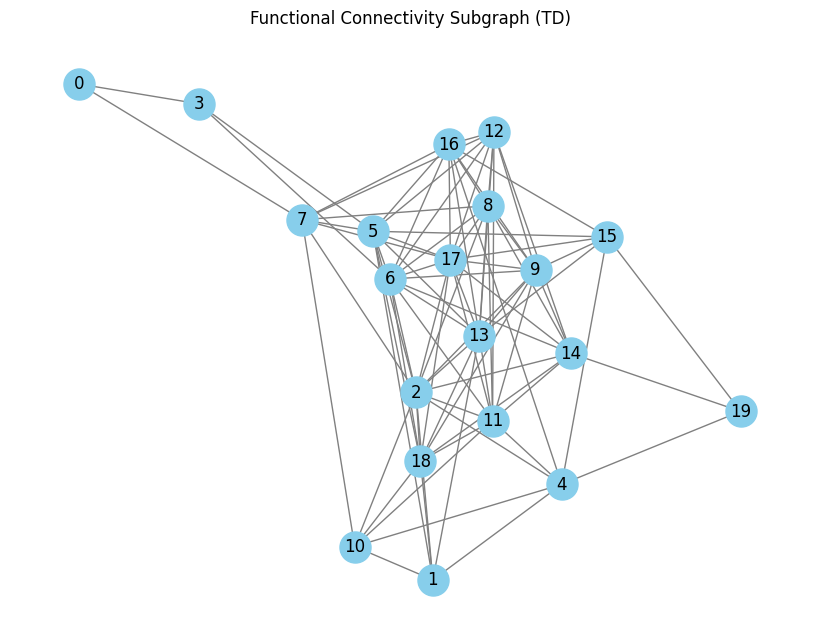

In [46]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Choose ASD or TD dataset
dataset_type = "TD"  # Change to "TD" for TD data
file_path = f"C:/path/to/the/save/folder/ABIDE_pcp/abide_{dataset_type.lower()}.npy"

# Load ABIDE data
abide_data = np.load(file_path, allow_pickle=True).item()

timeseries = abide_data["timeseries"]  # Use the corrected key

# Select first subject’s time series
subject_timeseries = timeseries[0]  # Shape: (ROIs, Timepoints)

# Compute correlation matrix
corr_matrix = np.corrcoef(subject_timeseries)  # Shape: (ROIs, ROIs)

# Remove self-connections
np.fill_diagonal(corr_matrix, 0)

# Select a **subset** of ROIs (e.g., first 20)
subset_size = 20  # Adjust as needed
subset_nodes = list(range(subset_size))  # Select first `subset_size` ROIs

# Create a subgraph
G = nx.Graph()
G.add_nodes_from(subset_nodes)

# Add edges with a threshold (removing weak connections)
threshold = 0.3  # Adjust threshold
for i in subset_nodes:
    for j in subset_nodes:
        if i != j and abs(corr_matrix[i, j]) > threshold:
            G.add_edge(i, j)

# Generate positions for nodes
pos = nx.spring_layout(G, seed=42)

# Draw graph using Matplotlib (No Weights)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray")

plt.title(f"Functional Connectivity Subgraph ({dataset_type})")
plt.show()


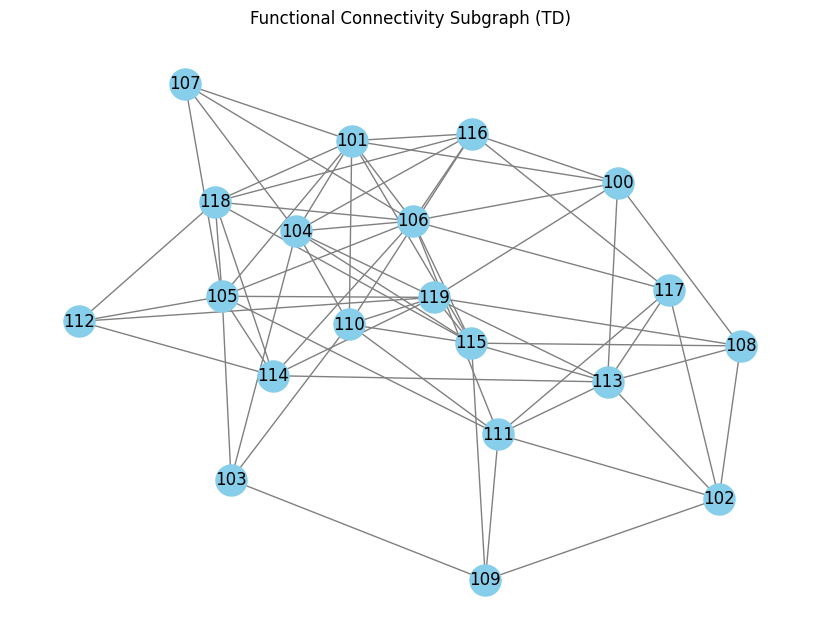

In [47]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Choose ASD or TD dataset
dataset_type = "TD"  # Change to "TD" for TD data
file_path = f"C:/path/to/the/save/folder/ABIDE_pcp/abide_{dataset_type.lower()}.npy"

# Load ABIDE data
abide_data = np.load(file_path, allow_pickle=True).item()

timeseries = abide_data["timeseries"]  # Use the corrected key

# Select first subject’s time series
subject_timeseries = timeseries[0]  # Shape: (ROIs, Timepoints)

# Compute correlation matrix
corr_matrix = np.corrcoef(subject_timeseries)  # Shape: (ROIs, ROIs)

# Remove self-connections
np.fill_diagonal(corr_matrix, 0)

# Select a **subset** of ROIs starting from the 100th ROI
subset_start = 100  # Start from 100th ROI
subset_size = 20    # Number of nodes to select
subset_nodes = list(range(subset_start, subset_start + subset_size)) 

# Create a subgraph
G = nx.Graph()
G.add_nodes_from(subset_nodes)

# Add edges with a threshold (removing weak connections)
threshold = 0.3  # Adjust threshold
for i in subset_nodes:
    for j in subset_nodes:
        if i != j and abs(corr_matrix[i, j]) > threshold:
            G.add_edge(i, j)

# Generate positions for nodes
pos = nx.spring_layout(G, seed=42)

# Draw graph using Matplotlib (No Weights)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray")

plt.title(f"Functional Connectivity Subgraph ({dataset_type})")
plt.show()


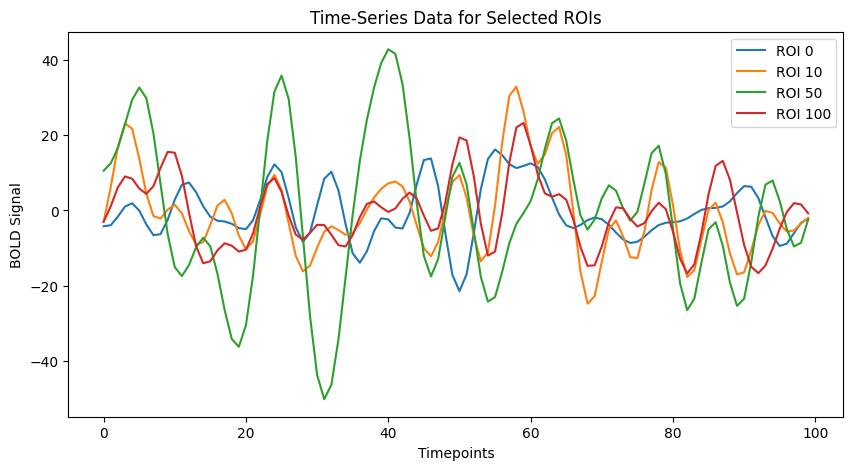

In [54]:
import matplotlib.pyplot as plt

# Select first subject’s time-series data
subject_timeseries = timeseries[0]  

# Select a few ROIs to visualize
roi_indices = [0, 10, 50, 100]  

plt.figure(figsize=(10, 5))
for roi in roi_indices:
    plt.plot(subject_timeseries[roi], label=f"ROI {roi}")

plt.xlabel("Timepoints")
plt.ylabel("BOLD Signal")
plt.title("Time-Series Data for Selected ROIs")
plt.legend()
plt.show()


In [32]:
import pandas as pd
import numpy as np

# File paths
npy_path = "C:/path/to/the/save/folder/ABIDE_pcp/abide_TD.npy"
csv_path = "C:/path/to/the/save/folder/ABIDE_pcp/Phenotypic_V1_0b_preprocessed1.csv"

# Load existing ABIDE dataset
abide = np.load(npy_path, allow_pickle=True).item()

# Load phenotypic CSV
csv = pd.read_csv(csv_path)

# Optional sanity print
print(f"Numpy samples: {len(abide['label'])}, CSV samples: {len(csv)}")

# Ensure both datasets align by index
csv = csv.iloc[:len(abide["label"])]  # Truncate to match .npy if needed

# Select and normalize clinical features
clinical_df = csv[["AGE_AT_SCAN", "SEX", "FIQ"]].copy()
clinical_df = clinical_df.fillna(clinical_df.mean())  # Handle NaNs
clinical_df = (clinical_df - clinical_df.mean()) / clinical_df.std()  # Normalize
clinical_np = clinical_df.to_numpy().astype(np.float32)

# Add to dictionary
abide["clinical"] = clinical_np

# Save updated dataset
output_path = "C:/path/to/the/save/folder/ABIDE_pcp/abide_with_clinical.npy"
np.save(output_path, abide)

print(f"✅ Clinical metadata embedded and saved to:\n{output_path}")


Numpy samples: 516, CSV samples: 1112
✅ Clinical metadata embedded and saved to:
C:/path/to/the/save/folder/ABIDE_pcp/abide_with_clinical.npy


Degree Distribution: [131, 136, 166, 161, 142, 154, 91, 160, 63, 55, 124, 164, 104, 117, 100, 127, 101, 101, 152, 103, 161, 165, 148, 173, 130, 128, 148, 167, 155, 119, 148, 150, 139, 122, 156, 97, 191, 152, 125, 89, 113, 108, 150, 157, 101, 162, 138, 143, 159, 150, 156, 59, 157, 130, 116, 57, 163, 170, 111, 131, 117, 146, 159, 149, 171, 183, 132, 92, 123, 136, 170, 101, 100, 75, 167, 167, 43, 160, 147, 13, 157, 128, 160, 51, 140, 28, 138, 126, 131, 79, 143, 128, 142, 92, 131, 128, 153, 91, 101, 122, 75, 150, 135, 136, 135, 162, 130, 132, 143, 169, 148, 188, 150, 154, 169, 83, 138, 48, 137, 80, 169, 142, 159, 137, 143, 66, 163, 159, 152, 101, 134, 128, 109, 67, 53, 160, 177, 147, 138, 134, 65, 142, 130, 137, 145, 186, 146, 86, 106, 137, 177, 70, 161, 135, 129, 143, 140, 104, 122, 104, 135, 43, 169, 139, 73, 152, 141, 155, 110, 155, 126, 140, 45, 175, 152, 45, 138, 144, 135, 124, 149, 79, 99, 112, 183, 123, 168, 159, 152, 78, 126, 51, 162, 63, 156, 167, 165, 144, 138, 183]
Avg Path Leng

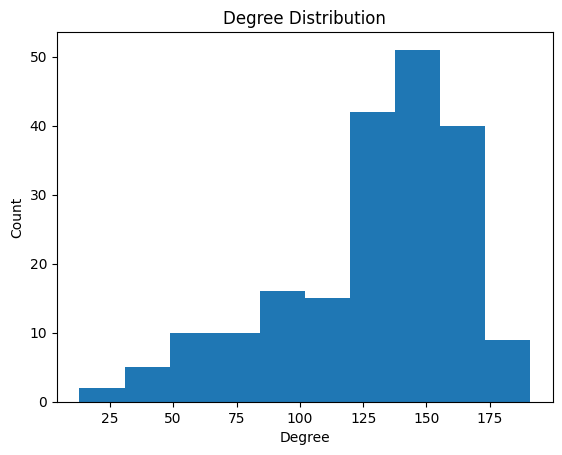

In [30]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load ABIDE graph
npy_path = "C:/path/to/the/save/folder/ABIDE_pcp/abide.npy"
abide = np.load(npy_path, allow_pickle=True).item()
graphs = abide["corr"]  # shape: [N, num_nodes, num_nodes]

# Choose a subject
adj = graphs[0]

# Optional: Threshold for sparsity (binarize)
threshold = 0.3
adj[adj < threshold] = 0
np.fill_diagonal(adj, 0)

# Create NetworkX graph
G = nx.from_numpy_array(adj)

# Compute metrics
degree_dist = [d for n, d in G.degree()]
avg_path = nx.average_shortest_path_length(G) if nx.is_connected(G) else np.nan
clustering = nx.average_clustering(G)
components = nx.number_connected_components(G)

# Print
print("Degree Distribution:", degree_dist)
print("Avg Path Length:", avg_path)
print("Clustering Coef:", clustering)
print("Connected Components:", components)

# Plot degree histogram
plt.hist(degree_dist)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()


Degree Distribution: [35, 34, 83, 30, 34, 51, 50, 50, 79, 106, 91, 66, 101, 80, 57, 66, 71, 88, 70, 33, 41, 53, 37, 64, 63, 55, 17, 45, 55, 74, 60, 42, 54, 59, 24, 77, 98, 53, 83, 70, 38, 59, 59, 81, 89, 88, 64, 95, 95, 83, 85, 47, 54, 59, 50, 31, 31, 105, 61, 43, 37, 41, 103, 98, 49, 49, 34, 62, 84, 76, 14, 88, 76, 29, 86, 20, 85, 12, 42, 98, 106, 85, 26, 67, 90, 81, 41, 54, 72, 48, 69, 18, 74, 81, 96, 46, 68, 56, 58, 111, 48, 71, 59, 65, 64, 71, 73, 80, 62, 11, 56, 20, 69, 81, 93, 37, 54, 65, 40, 74, 50, 44, 53, 54, 43, 86, 96, 59, 16, 15, 80, 83, 24, 37, 74, 85, 38, 81, 114, 74, 33, 65, 46, 12, 24, 67, 87, 84, 75, 70, 33, 107, 62, 49, 13, 75, 51, 96, 87, 10, 36, 79, 101, 70, 34, 88, 58, 56, 56, 82, 39, 73, 32, 80, 95, 91, 73, 70, 61, 40, 12, 37, 49, 21, 52, 76, 56, 53, 75, 28, 60, 92, 74, 90, 119, 17, 68, 10, 35, 63]
Avg Path Length: 1.75678391959799
Clustering Coef: 0.6135044553513574
Connected Components: 1


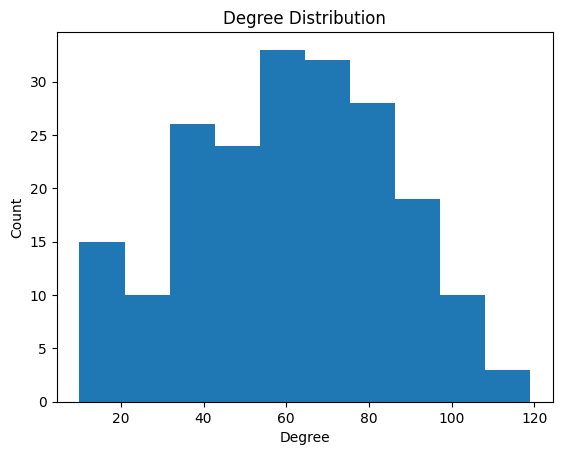

In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load ABIDE graph
npy_path = "C:/path/to/the/save/folder/ABIDE_pcp/abide_td.npy"
abide = np.load(npy_path, allow_pickle=True).item()
graphs = abide["corr"]  # shape: [N, num_nodes, num_nodes]

# Choose a subject
adj = graphs[0]

# Optional: Threshold for sparsity (binarize)
threshold = 0.3
adj[adj < threshold] = 0
np.fill_diagonal(adj, 0)

# Create NetworkX graph
G = nx.from_numpy_array(adj)

# Compute metrics
degree_dist = [d for n, d in G.degree()]
avg_path = nx.average_shortest_path_length(G) if nx.is_connected(G) else np.nan
clustering = nx.average_clustering(G)
components = nx.number_connected_components(G)

# Print
print("Degree Distribution:", degree_dist)
print("Avg Path Length:", avg_path)
print("Clustering Coef:", clustering)
print("Connected Components:", components)

# Plot degree histogram
plt.hist(degree_dist)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()


Degree Distribution: [48, 78, 53, 104, 57, 127, 88, 68, 140, 117, 73, 99, 133, 79, 70, 109, 105, 154, 39, 54, 96, 69, 137, 95, 128, 115, 75, 93, 110, 159, 96, 94, 33, 96, 81, 95, 160, 131, 87, 79, 133, 93, 56, 99, 172, 103, 125, 155, 108, 126, 82, 12, 102, 111, 124, 98, 71, 65, 73, 136, 148, 77, 90, 150, 112, 101, 75, 97, 58, 104, 88, 53, 119, 16, 98, 112, 99, 39, 111, 100, 76, 105, 94, 120, 68, 15, 139, 25, 111, 86, 48, 75, 106, 87, 105, 66, 73, 111, 75, 121, 91, 46, 102, 138, 80, 95, 92, 83, 29, 68, 84, 70, 100, 105, 93, 66, 26, 141, 129, 84, 104, 71, 111, 36, 151, 109, 119, 94, 21, 75, 41, 100, 90, 87, 47, 111, 113, 133, 103, 115, 23, 27, 89, 78, 42, 73, 70, 151, 59, 56, 137, 102, 140, 72, 43, 151, 127, 92, 150, 20, 89, 105, 134, 86, 42, 132, 100, 116, 80, 74, 106, 130, 47, 88, 133, 80, 116, 84, 100, 89, 62, 125, 96, 57, 95, 36, 70, 79, 135, 107, 126, 88, 81, 112, 89, 87, 104, 83, 67, 104]
Avg Path Length: 1.5409547738693468
Clustering Coef: 0.6661310275507268
Connected Components: 

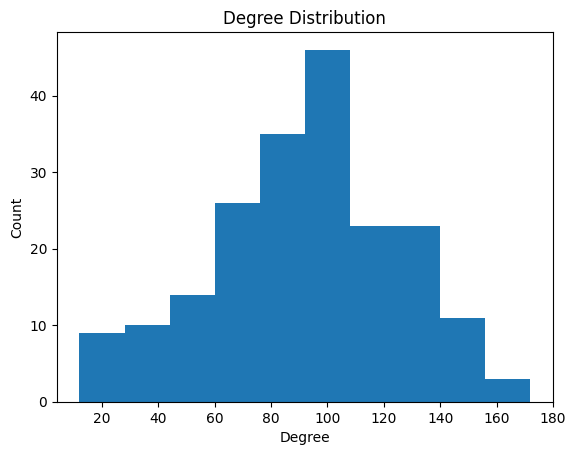

In [25]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load ABIDE graph
npy_path = "C:/path/to/the/save/folder/ABIDE_pcp/abide_asd.npy"
abide = np.load(npy_path, allow_pickle=True).item()
graphs = abide["corr"]  # shape: [N, num_nodes, num_nodes]

# Choose a subject
adj = graphs[1]

# Optional: Threshold for sparsity (binarize)
threshold = 0.3
adj[adj < threshold] = 0
np.fill_diagonal(adj, 0)

# Create NetworkX graph
G = nx.from_numpy_array(adj)

# Compute metrics
degree_dist = [d for n, d in G.degree()]
avg_path = nx.average_shortest_path_length(G) if nx.is_connected(G) else np.nan
clustering = nx.average_clustering(G)
components = nx.number_connected_components(G)

# Print
print("Degree Distribution:", degree_dist)
print("Avg Path Length:", avg_path)
print("Clustering Coef:", clustering)
print("Connected Components:", components)

# Plot degree histogram
plt.hist(degree_dist)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()


In [12]:
import numpy as np

# Load the dataset
try:
    npy_path = "C:/path/to/the/save/folder/ABIDE_pcp/abide.npy"
    data = np.load(npy_path, allow_pickle=True).item()
except FileNotFoundError:
    print("Error: abide.npy not found. Please make sure the file is in the same directory.")
    exit()

print("Dataset loaded successfully!")

# 1. Print the keys available in the dataset
print("\nKeys in the dataset:")
for key in data.keys():
    print(f"- {key}")

# 2. Inspect the shape and type of each array
print("\nShape and type of each array:")
for key, value in data.items():
    print(f"Key: '{key}'")
    if isinstance(value, np.ndarray):
        print(f"  Type: {type(value)}")
        print(f"  Shape: {value.shape}")
        if value.size > 0: # Check if array is not empty
            print(f"  First element type: {type(value.flat[0])}")
        else:
            print(f"  Array is empty.")
    else:
        print(f"  Type: {type(value)} (Not a numpy array, might be a single value or list)")
        print(f"  Value: {value}")


# 3. Display some sample data (e.g., first few entries)
print("\nSample Data:")

if 'timeseries' in data and data['timeseries'].shape[0] > 0:
    print("\n'timeseries' (first sample, first few time points/ROIs):")
    # Assuming timeseries is (num_subjects, num_rois, num_timepoints)
    # Or (num_subjects, num_timepoints, num_rois)
    # Let's assume (num_subjects, num_rois, num_timepoints) for now.
    # Adjust indexing based on actual shape if needed.
    if data['timeseries'].ndim == 3:
        print(data['timeseries'][0, :, :5]) # First subject, all ROIs, first 5 time points
    else:
        print("Timeseries data has unexpected dimensions. Displaying first element:")
        print(data['timeseries'][0])


if 'label' in data and data['label'].shape[0] > 0:
    print("\n'label' (first 10 entries):")
    print(data['label'][:10])
    # Also, it's useful to see unique labels and their counts
    unique_labels, counts = np.unique(data['label'], return_counts=True)
    print(f"Unique labels: {unique_labels}, Counts: {counts}")


if 'corr' in data and data['corr'].shape[0] > 0:
    print("\n'corr' (first sample, part of correlation matrix):")
    # Assuming 'corr' is (num_subjects, num_rois, num_rois)
    if data['corr'].ndim == 3:
        print(data['corr'][0, :5, :5]) # First subject, top-left 5x5 submatrix
    else:
        print("Correlation data has unexpected dimensions. Displaying first element:")
        print(data['corr'][0])


if 'pcorr' in data and data['pcorr'].shape[0] > 0:
    print("\n'pcorr' (first sample, part of partial correlation matrix):")
    # Assuming 'pcorr' is (num_subjects, num_rois, num_rois)
    if data['pcorr'].ndim == 3:
        print(data['pcorr'][0, :5, :5]) # First subject, top-left 5x5 submatrix
    else:
        print("Partial correlation data has unexpected dimensions. Displaying first element:")
        print(data['pcorr'][0])


if 'site' in data and data['site'].shape[0] > 0:
    print("\n'site' (first 10 entries):")
    print(data['site'][:10])
    unique_sites, counts_sites = np.unique(data['site'], return_counts=True)
    print(f"Unique sites: {unique_sites}, Counts: {counts_sites}")

Dataset loaded successfully!

Keys in the dataset:
- timeseires
- label
- corr
- pcorr
- site

Shape and type of each array:
Key: 'timeseires'
  Type: <class 'numpy.ndarray'>
  Shape: (1009, 200, 100)
  First element type: <class 'numpy.float64'>
Key: 'label'
  Type: <class 'numpy.ndarray'>
  Shape: (1009,)
  First element type: <class 'numpy.float64'>
Key: 'corr'
  Type: <class 'numpy.ndarray'>
  Shape: (1009, 200, 200)
  First element type: <class 'numpy.float64'>
Key: 'pcorr'
  Type: <class 'numpy.ndarray'>
  Shape: (1009, 200, 200)
  First element type: <class 'numpy.float64'>
Key: 'site'
  Type: <class 'numpy.ndarray'>
  Shape: (1009,)
  First element type: <class 'numpy.str_'>

Sample Data:

'label' (first 10 entries):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Unique labels: [0. 1.], Counts: [493 516]

'corr' (first sample, part of correlation matrix):
[[0.         0.6176946  0.70995376 0.35472607 0.30300887]
 [0.6176946  0.         0.68179387 0.20489138 0.42865911]
 [0.70995376 0.68179387